In [115]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

<h1>Web Scraping</h1>

In [116]:
r = requests.get("https://www.yelp.com/biz/tesla-san-francisco?osq=tesla")
r.status_code

200

In [117]:
r.text

'<!DOCTYPE html><html lang="en-US" prefix="og: http://ogp.me/ns#" style="margin: 0;padding: 0; border: 0; font-size: 100%; font: inherit; vertical-align: baseline;"><head><script>document.documentElement.className=document.documentElement.className.replace(/\x08no-js\x08/,"js");</script><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><meta http-equiv="Content-Language" content="en-US" /><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"><link rel="mask-icon" sizes="any" href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/b2bb2fb0ec9c/assets/img/logos/yelp_burst.svg" content="#FF1A1A"><link rel="shortcut icon" href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/dcfe403147fc/assets/img/logos/favicon.ico"><script> window.ga=window.ga||function(){(ga.q=ga.q||[]).push(arguments)};ga.l=+new Date;window.ygaPageStartTime=new Date().getTime();</script><script>\n            window.yelp = window.yelp || {};\

In [118]:
soup = BeautifulSoup(r.text, 'html.parser')

In [119]:
divs=soup.find_all(class_="comment__09f24__D0cxf css-qgunke") 

In [120]:
divs

[<p class="comment__09f24__D0cxf css-qgunke"><span class="raw__09f24__T4Ezm" lang="en">Wow! The best tesla service center I have ever been to. In previous experiences in Berkeley and LA, it takes over 2 months to get an appointment but I was able to schedule one here for the next week. They had coffee and snacks and my repair was done in 30 min. I didn't catch his name but the person working on my car was a younger asian man with glasses. I am definitely going to look for him next time I have to come in. I had such a hatred for tesla service centers before but now I am glad to know I can rely on this location!!</span></p>,
 <p class="comment__09f24__D0cxf css-qgunke"><span class="raw__09f24__T4Ezm" lang="en">Really poor service. I took my car in to get the front passenger door fixed on Monday and was told the part was delivered damaged so I needed to reschedule the appointment for Friday and they would do it via mobile service. So the service center scheduled a 8am-12pm Friday mobile s

In [121]:
reviews=[]
for div in divs:
    m = (div.find('span').text) #gets the text from the span tag
    reviews.append(m)
    

In [122]:
reviews

["Wow! The best tesla service center I have ever been to. In previous experiences in Berkeley and LA, it takes over 2 months to get an appointment but I was able to schedule one here for the next week. They had coffee and snacks and my repair was done in 30 min. I didn't catch his name but the person working on my car was a younger asian man with glasses. I am definitely going to look for him next time I have to come in. I had such a hatred for tesla service centers before but now I am glad to know I can rely on this location!!",
 "Really poor service. I took my car in to get the front passenger door fixed on Monday and was told the part was delivered damaged so I needed to reschedule the appointment for Friday and they would do it via mobile service. So the service center scheduled a 8am-12pm Friday mobile service appointment to get the door fixed. No one showed up, no communication, and no one responded to questions on the mobile app. Finally, at 5pm I got a message that they didn't 

<h3>Making a dataset</h3>

In [123]:
import numpy as np
import pandas as pd

In [124]:
df=pd.DataFrame(np.array(reviews),columns=['review'] )

In [125]:
df

,review
0,Wow! The best tesla service center I have ever...
1,Really poor service. I took my car in to get t...
2,Helena KElon Musk!Is climbing the highest moun...
3,I waited for 25 mins and no one even acknowled...
4,In a nutshell: Tesla sucks! I leased one of th...
5,Delivery and customer service experience is be...
6,I took back my 2018 Model 3 last month for saf...
7,"Well, I had an issue with my Tesla. Took it in..."
8,Nick has been amazing in educating us about th...
9,Classic sales person technique. Text you to co...


In [126]:
len(df['review'])

10

In [127]:
df['word_count'] = df['review'].apply(lambda x:len(x.split()))

In [128]:
df

,review,word_count
0,Wow! The best tesla service center I have ever...,109
1,Really poor service. I took my car in to get t...,111
2,Helena KElon Musk!Is climbing the highest moun...,125
3,I waited for 25 mins and no one even acknowled...,59
4,In a nutshell: Tesla sucks! I leased one of th...,136
5,Delivery and customer service experience is be...,51
6,I took back my 2018 Model 3 last month for saf...,49
7,"Well, I had an issue with my Tesla. Took it in...",73
8,Nick has been amazing in educating us about th...,83
9,Classic sales person technique. Text you to co...,86


In [129]:
stopwords_list  = stopwords.words('english')

In [130]:
df['num_of_stopwords'] = df['review'].apply(lambda x: len([x for x in x.split() if x.lower() in stopwords_list]))

In [131]:
df

,review,word_count,num_of_stopwords
0,Wow! The best tesla service center I have ever...,109,58
1,Really poor service. I took my car in to get t...,111,49
2,Helena KElon Musk!Is climbing the highest moun...,125,48
3,I waited for 25 mins and no one even acknowled...,59,31
4,In a nutshell: Tesla sucks! I leased one of th...,136,65
5,Delivery and customer service experience is be...,51,24
6,I took back my 2018 Model 3 last month for saf...,49,15
7,"Well, I had an issue with my Tesla. Took it in...",73,38
8,Nick has been amazing in educating us about th...,83,41
9,Classic sales person technique. Text you to co...,86,36


<h1>Data Clean</h1>

In [132]:
import string

<h3>Removing Puncuation</h3>

In [133]:
df['no_punct']=df['review'].apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))

In [134]:
df['lowered'] = df['no_punct'].apply(lambda x: ' '.join(word.lower() for word in x.split()))

<h3>Removing stopwords</h3>

In [136]:
df['null_stopwords'] = df['lowered'].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords_list]))

In [137]:
df['word_count_after_no_stop'] = df['null_stopwords'].apply(lambda x:len(x.split()))

<h3>Lemmatization</h3>

In [138]:
import textblob
from textblob import Word

In [139]:
df['Lemmatized'] = df['null_stopwords'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [140]:
df['word_count_after_lemi'] = df['Lemmatized'].apply(lambda x:len(x.split()))

In [141]:
df

,review,word_count,num_of_stopwords,no_punct,lowered,null_stopwords,word_count_after_no_stop,Lemmatized,word_count_after_lemi
0,Wow! The best tesla service center I have ever...,109,58,Wow The best tesla service center I have ever ...,wow the best tesla service center i have ever ...,wow best tesla service center ever previous ex...,50,wow best tesla service center ever previous ex...,50
1,Really poor service. I took my car in to get t...,111,49,Really poor service I took my car in to get th...,really poor service i took my car in to get th...,really poor service took car get front passeng...,62,really poor service took car get front passeng...,62
2,Helena KElon Musk!Is climbing the highest moun...,125,48,Helena KElon MuskIs climbing the highest mount...,helena kelon muskis climbing the highest mount...,helena kelon muskis climbing highest mount wor...,75,helena kelon muskis climbing highest mount wor...,75
3,I waited for 25 mins and no one even acknowled...,59,31,I waited for 25 mins and no one even acknowled...,i waited for 25 mins and no one even acknowled...,waited 25 mins one even acknowledged show room...,28,waited 25 min one even acknowledged show room ...,28
4,In a nutshell: Tesla sucks! I leased one of th...,136,65,In a nutshell Tesla sucks I leased one of thei...,in a nutshell tesla sucks i leased one of thei...,nutshell tesla sucks leased one model ys 2021 ...,70,nutshell tesla suck leased one model y 2021 te...,70
5,Delivery and customer service experience is be...,51,24,Delivery and customer service experience is be...,delivery and customer service experience is be...,delivery customer service experience beyond ho...,26,delivery customer service experience beyond ho...,26
6,I took back my 2018 Model 3 last month for saf...,49,15,I took back my 2018 Model 3 last month for saf...,i took back my 2018 model 3 last month for saf...,took back 2018 model 3 last month safety recal...,34,took back 2018 model 3 last month safety recal...,34
7,"Well, I had an issue with my Tesla. Took it in...",73,38,Well I had an issue with my Tesla Took it into...,well i had an issue with my tesla took it into...,well issue tesla took service center thursday ...,32,well issue tesla took service center thursday ...,32
8,Nick has been amazing in educating us about th...,83,41,Nick has been amazing in educating us about th...,nick has been amazing in educating us about th...,nick amazing educating us teslas answering man...,41,nick amazing educating u tesla answering many ...,41
9,Classic sales person technique. Text you to co...,86,36,Classic sales person technique Text you to con...,classic sales person technique text you to con...,classic sales person technique text confirm me...,47,classic sale person technique text confirm mee...,47


<h1>Sentiment Analysis</h1>

In [142]:
df['Polarity'] = df['Lemmatized'].apply(lambda x: textblob.TextBlob(x).sentiment[0])

In [143]:
df['Subjectivity'] = df['Lemmatized'].apply(lambda x: textblob.TextBlob(x).sentiment[1])

In [145]:
df.drop(['num_of_stopwords','no_punct','lowered','null_stopwords','word_count_after_no_stop'],axis=1,inplace=True)

In [146]:
df

,review,word_count,Lemmatized,word_count_after_lemi,Polarity,Subjectivity
0,Wow! The best tesla service center I have ever...,109,wow best tesla service center ever previous ex...,50,0.144444,0.315972
1,Really poor service. I took my car in to get t...,111,really poor service took car get front passeng...,62,-0.166667,0.554321
2,Helena KElon Musk!Is climbing the highest moun...,125,helena kelon muskis climbing highest mount wor...,75,0.285000,0.606667
3,I waited for 25 mins and no one even acknowled...,59,waited 25 min one even acknowledged show room ...,28,-0.081818,0.450000
4,In a nutshell: Tesla sucks! I leased one of th...,136,nutshell tesla suck leased one model y 2021 te...,70,-0.145000,0.515833
5,Delivery and customer service experience is be...,51,delivery customer service experience beyond ho...,26,-0.075000,0.728472
6,I took back my 2018 Model 3 last month for saf...,49,took back 2018 model 3 last month safety recal...,34,0.166667,0.261111
7,"Well, I had an issue with my Tesla. Took it in...",73,well issue tesla took service center thursday ...,32,0.000000,0.413333
8,Nick has been amazing in educating us about th...,83,nick amazing educating u tesla answering many ...,41,0.502066,0.640220
9,Classic sales person technique. Text you to co...,86,classic sale person technique text confirm mee...,47,0.186458,0.490476


<h3>Wordcloud</h3>

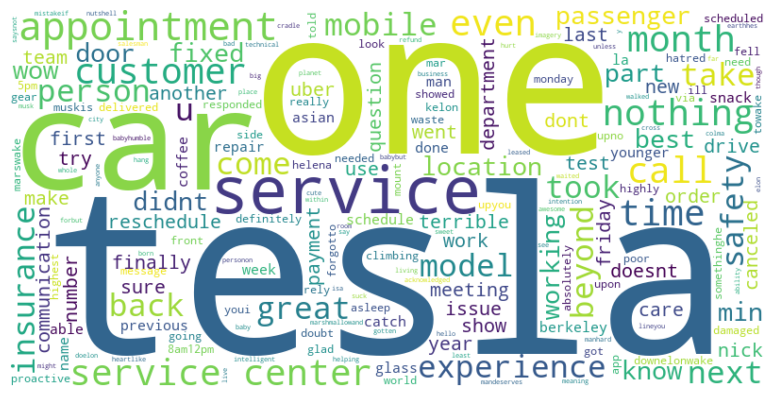

In [149]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sample text (replace this with your own text or read from a file)
text = ' '.join(df['Lemmatized'])
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5),dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
